# About The DataSet

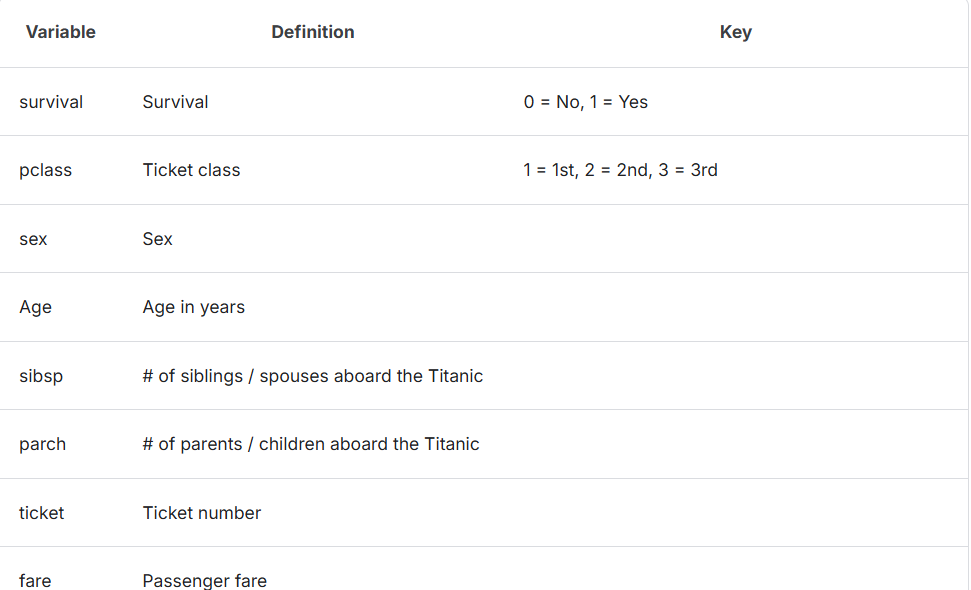
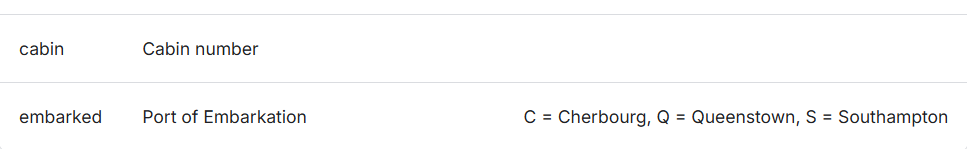

Variable Notes

pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

## Data Cleaning And Preprocessing

In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


In [37]:
df = pd.read_csv("/kaggle/input/titanic-dataset/Titanic-Dataset.csv")

In [38]:
df.head(20)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Checking data type,statistical properties,and null values

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [41]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Data Cleaning

I am gonna remove the attribute PassengerID,Name,Ticket because these attributes dont make sense for prediction i.e reduntdant features.

In [42]:
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


#### Filling missing age value with median

In [44]:
df['Age'].fillna(df["Age"].median(),inplace=True)

/tmp/ipykernel_35/2154918442.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df["Age"].median(),inplace=True)


In [45]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [46]:
len(df)

891

In [47]:
print(f"The percentage of data missing in Cabin Attribute:{(df['Cabin'].isna().sum()/len(df))*100}%")

The percentage of data missing in Cabin Attribute:77.10437710437711%


We can clearly see the percentage of data missing in cabin attribute is 77% so it has more than 50% of its data missing further more from the common sense it doesnt make sense to fill the Cabin Attribute with median value because if you look at it from the real life perspective ,77 % (687 people out of 891 in this case) percent of the passenger living in the same cabin ? that is not possible because 687 people cant fit in a single cabin, so if you fill it up using median it will not make sense.
BUT if you fill that cabin information using KNN imputer it may make sense as it will use the concept of nearest neighbour but then again 77% of the data missing so it may not give good values so we are going to remove Cabin Attribute

In [95]:
df1 = df.copy()

In [96]:
df1.drop("Cabin",axis=1,inplace=True)

In [97]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [98]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### Filling missing Embarked value with Mode

In [103]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0],inplace=True)

In [104]:
df1.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [105]:
len(df1)

891

### Converting categorical to numerical

In [106]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()

# Initialize LabelEncoders
sex_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()

# Fit and transform
df1['Sex'] = sex_encoder.fit_transform(df1['Sex'])
df1['Embarked'] = embarked_encoder.fit_transform(df1['Embarked'])


In [107]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [108]:
# Print class mappings
print("Class mapping for 'Sex':")
for i, cls in enumerate(sex_encoder.classes_):
    print(f"{cls} → {i}")

print("\nClass mapping for 'Embarked':")
for i, cls in enumerate(embarked_encoder.classes_):
    print(f"{cls} → {i}")

Class mapping for 'Sex':
female → 0
male → 1

Class mapping for 'Embarked':
C → 0
Q → 1
S → 2


### Normalizing the data

In [109]:
from sklearn.preprocessing import MinMaxScaler
M = MinMaxScaler()
f = ["Age","Fare"]
df1[f]=M.fit_transform(df1[f])

In [110]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


### Checking Box Plot

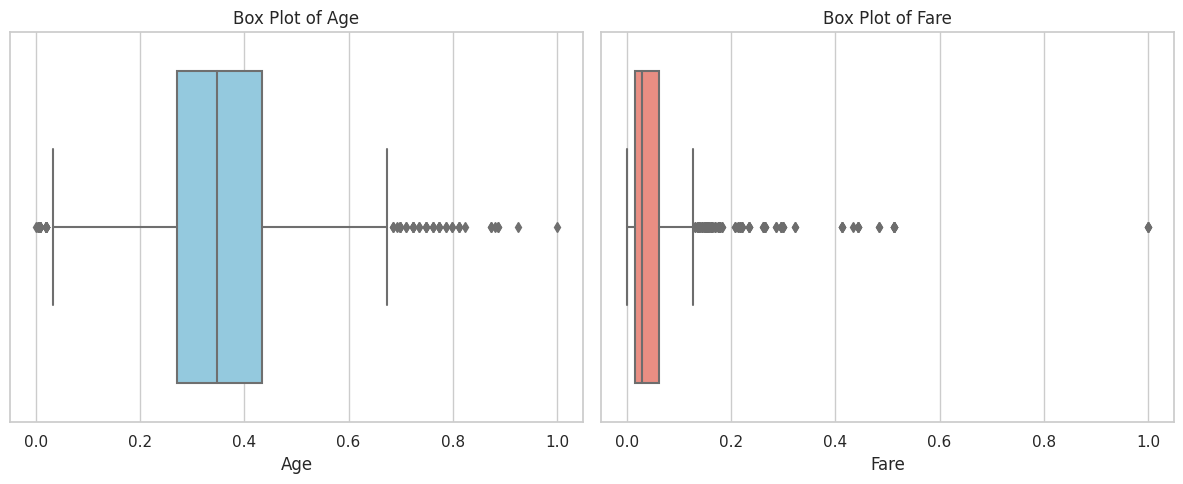

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set plot style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(12, 5))

# Box plot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x=df1['Age'], color='skyblue')
plt.title('Box Plot of Age')

# Box plot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Fare'], color='salmon')
plt.title('Box Plot of Fare')

plt.tight_layout()
plt.show()

#### BOX PLOTS
Box plots are generally used to visualize the outliers using IQR.

In [112]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    l = q1 - 1.5*iqr
    h = q3+1.5*iqr
    return df[(df[col]>=l) &  (df[col]<=h)]


In [113]:
df1 = remove_outliers(df1,'Age')
df1 = remove_outliers(df1,'Fare')

In [114]:
len(df1)

718

In [115]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
5,0,3,1,0.346569,0,0,0.016510,1


In [116]:
df1.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.346569,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0
890,0,3,1,0.396833,0,0,0.015127,1
